<a href="https://colab.research.google.com/github/AdrianCobo/Deep-Learning-And-Artificial-Intelligence/blob/main/Lesson03_Linear_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch 
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Load in the data
from sklearn.datasets import load_breast_cancer

In [ ]:
# Load the data
data = load_breast_cancer()

In [ ]:
# check the data of 'data'
type(data)

sklearn.utils.Bunch

In [ ]:
# note: it is a Bunch object
# this is basically acts like a dictionary where you can treat the keys like attributes
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
# 'data' (the attribute) means the input data
data.data.shape
# it has 569 samples, 30 input features

(569, 30)

In [ ]:
# 'targets'
data.target
# note how the targets are just 0s and 1s
# normalyy, when you have K targets, they are labeled 0...K-1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [ ]:
# their meaning is not lost
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
# there are also 569 corresponding targets
data.target.shape

(569,)

In [ ]:
# you can also determine the meaning of each feature
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
# Normally we sould put all of our imports at the top
# but this lets us tell a story
from sklearn.model_selection import train_test_split

# split the data into train and test sets
# this lets us simulate how our model will perform in the future
X_train, X_test, Y_train, Y_test = train_test_split(data.data, data.target, test_size=0.33)
N, D = X_train.shape

In [ ]:
# Scale the data
# you'll learn why scaling is needed  in a letter course
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# now all the fun pythorch stuff
# Build the model
model = nn.Sequential(
    nn.Linear(D,1),
    nn.Sigmoid()
)

In [ ]:
# Loss and optimizer
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters())

In [ ]:
# Convert data into torch tensors
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
Y_train = torch.from_numpy(Y_train.astype(np.float32).reshape(-1,1))
Y_test = torch.from_numpy(Y_test.astype(np.float32).reshape(-1,1))

In [ ]:
# Train the model
n_epochs = 1000

# stuff to store
train_losses = np.zeros(n_epochs)
test_losses = np.zeros(n_epochs)

for it in range(n_epochs):
  # zero the parameter gradients
  optimizer.zero_grad()

  # Forward pass
  outputs = model(X_train)
  loss = criterion(outputs, Y_train)

  # Backward and optimize
  loss.backward()
  optimizer.step()

  # Get test loss
  outputs_test = model(X_test)
  loss_test = criterion(outputs_test, Y_test)

  # Save losses
  train_losses[it] = loss.item()
  test_losses[it] = loss_test.item()
  if (it + 1) % 50 == 0:
    print(f'Epoch {it+1}/{n_epochs}, Train Loss: {loss.item():.4f}, Test Loss: {loss_test.item()}')

  # Test loss increasing during training = overfitting the model

Epoch 50/1000, Train Loss: 0.3841, Test Loss: 0.3627970814704895
Epoch 100/1000, Train Loss: 0.2879, Test Loss: 0.2618294954299927
Epoch 150/1000, Train Loss: 0.2351, Test Loss: 0.20813679695129395
Epoch 200/1000, Train Loss: 0.2020, Test Loss: 0.17553627490997314
Epoch 250/1000, Train Loss: 0.1793, Test Loss: 0.15378542244434357
Epoch 300/1000, Train Loss: 0.1628, Test Loss: 0.13828250765800476
Epoch 350/1000, Train Loss: 0.1501, Test Loss: 0.12668976187705994
Epoch 400/1000, Train Loss: 0.1400, Test Loss: 0.11770158261060715
Epoch 450/1000, Train Loss: 0.1318, Test Loss: 0.11053391546010971
Epoch 500/1000, Train Loss: 0.1250, Test Loss: 0.10468866676092148
Epoch 550/1000, Train Loss: 0.1192, Test Loss: 0.09983466565608978
Epoch 600/1000, Train Loss: 0.1141, Test Loss: 0.09574341028928757
Epoch 650/1000, Train Loss: 0.1097, Test Loss: 0.09225212037563324
Epoch 700/1000, Train Loss: 0.1058, Test Loss: 0.08924176543951035
Epoch 750/1000, Train Loss: 0.1024, Test Loss: 0.0866232216358184

In [ ]:
# Plot the train loss and test loss per iteration
plt.plot(train_losses, label='train loss')
plt.plot(test_losses,label='test loss')
plt.legend()
plt.show()

In [ ]:
# Get accuracy
with torch.no_grad():
  p_train = model(X_train)
  p_train = np.round(p_train.numpy())
  train_acc = np.mean(Y_train.numpy() == p_train)

  p_test = model(X_test)
  p_test = np.round(p_test.numpy())
  test_acc = np.mean(Y_test.numpy() == p_test)
print(f"Train acc: {train_acc:.4f}, Test acc: {test_acc:.4f}")


Train acc: 0.9816, Test acc: 0.9894


In [ ]:
# Plot the accuracy too
# plt.plot(r.history['accuracy'], label='acc')
# plt.plot(r.history['val_accuracy'], label='val_acc')
# plt.legend()

# **Save and Load Model**

In [1]:
# Look at the state dict
model.state_dict()

NameError: ignored

In [ ]:
# Save the model
torch.save(model.state_dict(), 'mymodel.pt')

In [ ]:
!ls

In [ ]:
# Load the model
# Note: this makes more sense and is more compact when
# your model is a big class, as we will be seing later.
model2 = nn.Sequential(
    nn.Linear(D,1),
    nn.Sigmoid()
)
model2.load_state_dict(torch.load('mymodel.pt'))

In [ ]:
# Evaluate the new model
# Results should be the same
with torch.no_grad():
  p_train = model(X_train)
  p_train = np.round(p_train.numpy())
  train_acc = np.mean(Y_train.numpy() == p_train)

  p_test = model(X_test)
  p_test = np.round(p_test.numpy())
  test_acc = np.mean(Y_test.numpy() == p_test)
print(f"Train acc: {train_acc:.4f}, Test acc: {test_acc:.4f}")


**Download the model**

In [ ]:
from google.colab import files
files.download('mymodel.pt')
# you can also click the folder google colab symfol on the left part of google collab

# BCE Loss with logits

Why? Numerical instability. Exponentialing things leads to very large numbers (larger than a computer can represent).


In [13]:
import torch 
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [14]:
# Load in the data
from sklearn.datasets import load_breast_cancer

In [15]:
# Load the data
data = load_breast_cancer()

In [16]:
# Normally we sould put all of our imports at the top
# but this lets us tell a story
from sklearn.model_selection import train_test_split

# split the data into train and test sets
# this lets us simulate how our model will perform in the future
X_train, X_test, Y_train, Y_test = train_test_split(data.data, data.target, test_size=0.33)
N, D = X_train.shape

In [17]:
# Scale the data
# you'll learn why scaling is needed  in a letter course
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
# now all the fun pythorch stuff
# Build the model
model = nn.Sequential(nn.Linear(D,1))

In [19]:
# Loss and optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters())

In [20]:
# Convert data into torch tensors
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
Y_train = torch.from_numpy(Y_train.astype(np.float32).reshape(-1,1))
Y_test = torch.from_numpy(Y_test.astype(np.float32).reshape(-1,1))

In [21]:
# Train the model
n_epochs = 1000

# stuff to store
train_losses = np.zeros(n_epochs)
test_losses = np.zeros(n_epochs)

for it in range(n_epochs):
  # zero the parameter gradients
  optimizer.zero_grad()

  # Forward pass
  outputs = model(X_train)
  loss = criterion(outputs, Y_train)

  # Backward and optimize
  loss.backward()
  optimizer.step()

  # Get test loss
  outputs_test = model(X_test)
  loss_test = criterion(outputs_test, Y_test)

  # Save losses
  train_losses[it] = loss.item()
  test_losses[it] = loss_test.item()
  if (it + 1) % 50 == 0:
    print(f'Epoch {it+1}/{n_epochs}, Train Loss: {loss.item():.4f}, Test Loss: {loss_test.item()}')

  # Test loss increasing during training = overfitting the model

Epoch 50/1000, Train Loss: 0.3983, Test Loss: 0.44707635045051575
Epoch 100/1000, Train Loss: 0.3009, Test Loss: 0.3463469445705414
Epoch 150/1000, Train Loss: 0.2466, Test Loss: 0.286310613155365
Epoch 200/1000, Train Loss: 0.2119, Test Loss: 0.24656981229782104
Epoch 250/1000, Train Loss: 0.1876, Test Loss: 0.2185049206018448
Epoch 300/1000, Train Loss: 0.1697, Test Loss: 0.1977974772453308
Epoch 350/1000, Train Loss: 0.1560, Test Loss: 0.18198031187057495
Epoch 400/1000, Train Loss: 0.1450, Test Loss: 0.16952402889728546
Epoch 450/1000, Train Loss: 0.1361, Test Loss: 0.15944361686706543
Epoch 500/1000, Train Loss: 0.1287, Test Loss: 0.15109051764011383
Epoch 550/1000, Train Loss: 0.1224, Test Loss: 0.14402823150157928
Epoch 600/1000, Train Loss: 0.1170, Test Loss: 0.1379556804895401
Epoch 650/1000, Train Loss: 0.1123, Test Loss: 0.13265979290008545
Epoch 700/1000, Train Loss: 0.1081, Test Loss: 0.12798616290092468
Epoch 750/1000, Train Loss: 0.1045, Test Loss: 0.12382027506828308
Ep

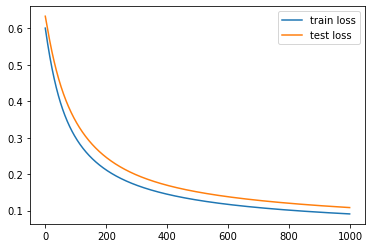

In [22]:
# Plot the train loss and test loss per iteration
plt.plot(train_losses, label='train loss')
plt.plot(test_losses,label='test loss')
plt.legend()
plt.show()

In [24]:
# Get accuracy
with torch.no_grad():
  p_train = model(X_train)
  p_train = (p_train.numpy() > 0)
  train_acc = np.mean(Y_train.numpy() == p_train)

  p_test = model(X_test)
  p_test = (p_test.numpy() > 0)
  test_acc = np.mean(Y_test.numpy() == p_test)
print(f"Train acc: {train_acc:.4f}, Test acc: {test_acc:.4f}")

Train acc: 0.9816, Test acc: 0.9787
